<a href="https://colab.research.google.com/github/AlexKostjuk/Dz_13/blob/master/dz_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import kagglehub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [43]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,              # кількість епохи без покращення
    restore_best_weights=True
)

In [52]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9819 - val_loss: 0.0613
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9826 - val_loss: 0.0601
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9829 - val_loss: 0.0564
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9824 - val_loss: 0.0611
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9823 - val_loss: 0.0575
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9826 - val_loss: 0.0673


оцінка моделі


In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nТочність на тестовому наборі: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0677

Точність на тестовому наборі: 0.9829


графік точності


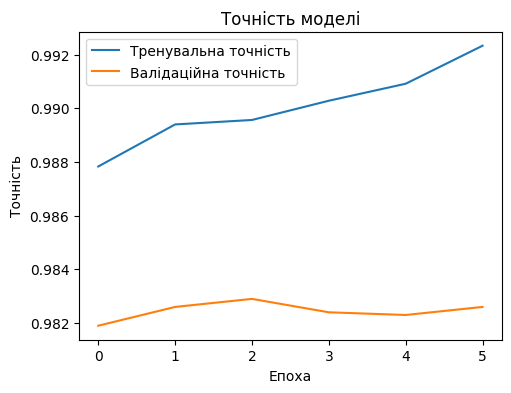

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

графік втрат


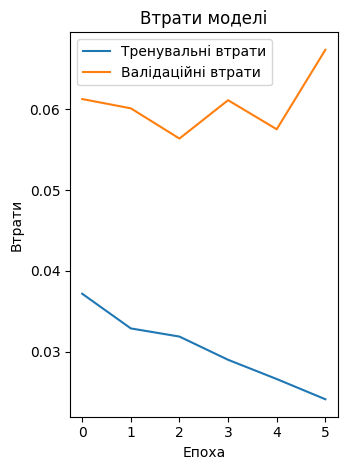

In [55]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


візуалізація тестового зображення

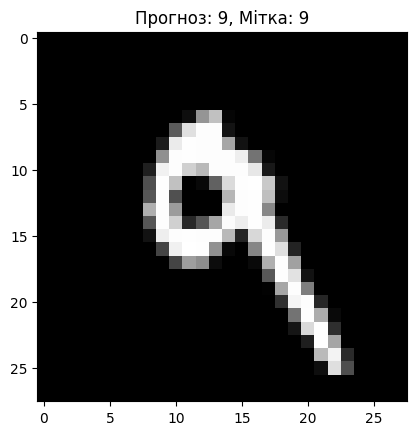

In [56]:
plt.figure()
plt.imshow(x_test[7].reshape(28, 28), cmap='gray')
plt.title(f'Прогноз: {np.argmax(predictions[7])}, Мітка: {np.argmax(y_test[7])}')
plt.show()

пошукаємо більш кращю модель та загруземо її на наш гугл диск



модель звідци
https://huggingface.co/spaces/ayaanzaveri/mnist/tree/c959fe1db8b15ed643b91856cb2db4e2a3125938

In [4]:
model_h5 = models.load_model('/content/drive/MyDrive/mnist-model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


структура моделі

In [5]:
model_h5.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 692,684 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

In [17]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [18]:
train_images_255 = train_images / 255.0

test_images_255 = test_images / 255.0

In [9]:
model_h5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Указываем явно
)

In [23]:
test_loss, test_acc = model_h5.evaluate(test_images_255,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0355
Test accuracy: 0.9934999942779541


In [20]:
predictions_h5 = model_h5.predict(test_images_255)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


візуалізація тестового зображення

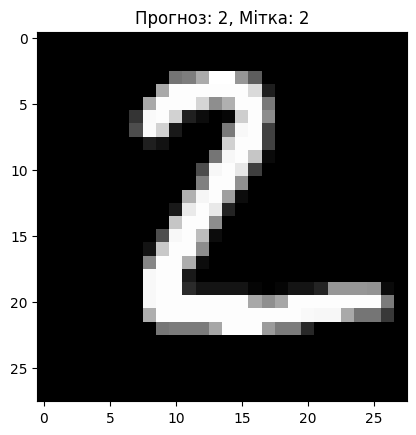

In [27]:
plt.figure()
plt.imshow(test_images[1].reshape(28, 28), cmap='gray')
plt.title(f'Прогноз: {np.argmax(predictions_h5[1])}, Мітка: {test_labels[1]}')
plt.show()

модель показала кращі результати але перед роботою потребує компеляіції щоб це виправити треба трохи виправити збереження моделі

In [ ]:
# model.save('/content/drive/MyDrive/mnist-model.h5', include_optimizer=True)

In [25]:
# model = models.Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
# model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
# model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))

# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Flatten())
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(512,activation="relu"))

# model.add(layers.Dense(10,activation="softmax"))

In [26]:
# model.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    # loss='sparse_categorical_crossentropy',
    # metrics=['accuracy'])

In [27]:
# history = model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9500 - loss: 0.1630 - val_accuracy: 0.9825 - val_loss: 0.0528
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9886 - loss: 0.0384 - val_accuracy: 0.9725 - val_loss: 0.1033
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9921 - loss: 0.0266 - val_accuracy: 0.9903 - val_loss: 0.0316


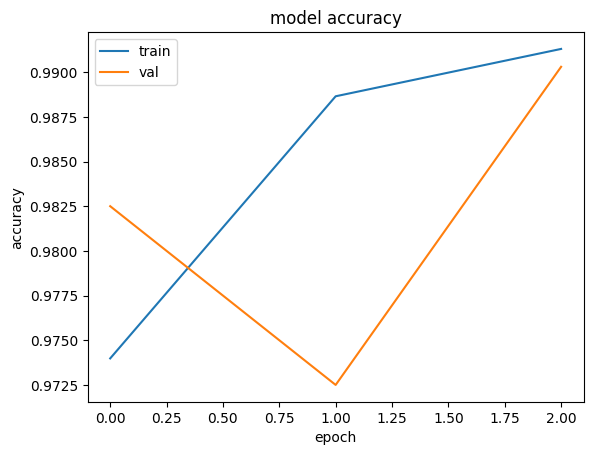

In [28]:
# from matplotlib import pyplot as plt
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()